In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing wordcloud for word visualization
from wordcloud import WordCloud
#importing nltk for natural language processing
import nltk
from nltk.corpus import stopwords

#DOWNLOADING NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nagir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [123]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [124]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#FFF")]}
])
styled_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


Data Info

In [125]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


Drop the Columns

In [126]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True,errors='ignore')

In [127]:
styled_df = df.head(5).style
# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FFF"), ('font-weight', 'bold')]}
])

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


 Rename the Column


In [128]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

 Convert the target variable

In [129]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])



In [130]:
styled_df = df.head().style
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FFF"), ('font-weight', 'bold')]}
])

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


 Check Missing values

In [131]:
df.isnull().sum()

target    0
text      0
dtype: int64

 Check Duplicate values

In [132]:
df.duplicated().sum()

403

 Remove Duplicate values

In [133]:
df = df.drop_duplicates(keep = 'first')

 Shape of the Dataset

In [134]:
df.shape

(5169, 2)

EXPLORATORY DATA ANALYSIS



 Percentage of Ham and Spam

In [135]:
values = df['target'].value_counts()
total = values.sum()
percentage_0 = (values[0] / total) * 100
percentage_1 = (values[1]/ total) *100
print(f"Percentage of Ham: {percentage_0:.2f}%")
print(f"Percentage of Spam: {percentage_1:.2f}%")

Percentage of Ham: 87.37%
Percentage of Spam: 12.63%


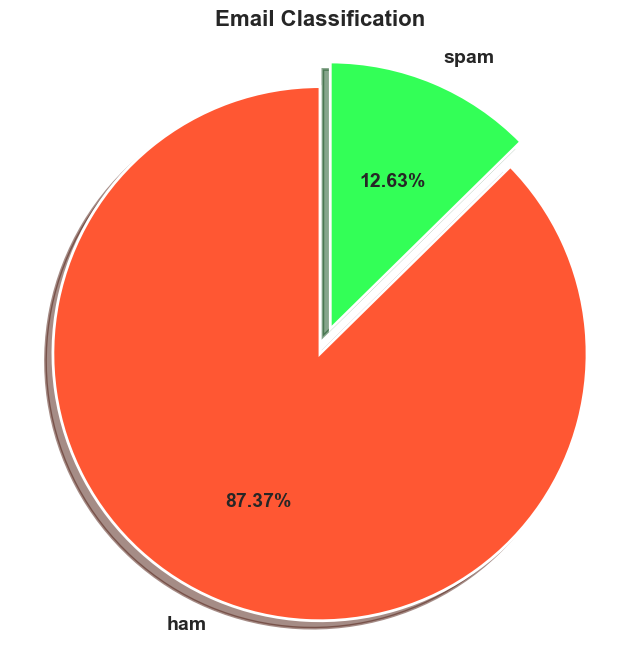

In [136]:

import matplotlib.pyplot as plt
colors = ['#FF5733', '#33FF57']
# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%
fig , ax = plt.subplots(figsize=(8,8))
ax.set_facecolor('white')
wedges , texts , autotexts = ax.pie(
    values, labels = ['ham' , 'spam'],
    autopct='%0.2f%%',
    startangle = 90,
    colors = colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,
    shadow = True

)
# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

ax.set_title('Email Classification', fontsize=16, fontweight='bold')
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

The graph the percentage of ham is too high (87.37%) as compare to spam messages percentage.
so the data is imbalance

Text Length and Structure Analysis

In [137]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\nagir\AppData\Local\Temp\ipykernel_52484\1984334277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)
C:\Users\nagir\AppData\Local\Temp\ipykernel_52484\1984334277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\nagir\AppData\Local\Temp\ipykernel_52484\1984334277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [138]:
df[['num_characters', 'num_words', 'num_sentence']].describe()


,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


 Summary Statistics for Legitimate Messages

In [139]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


Summary Statistics for Spam Messages

In [140]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Character Length Distribution for Legitimate and Spam Messages

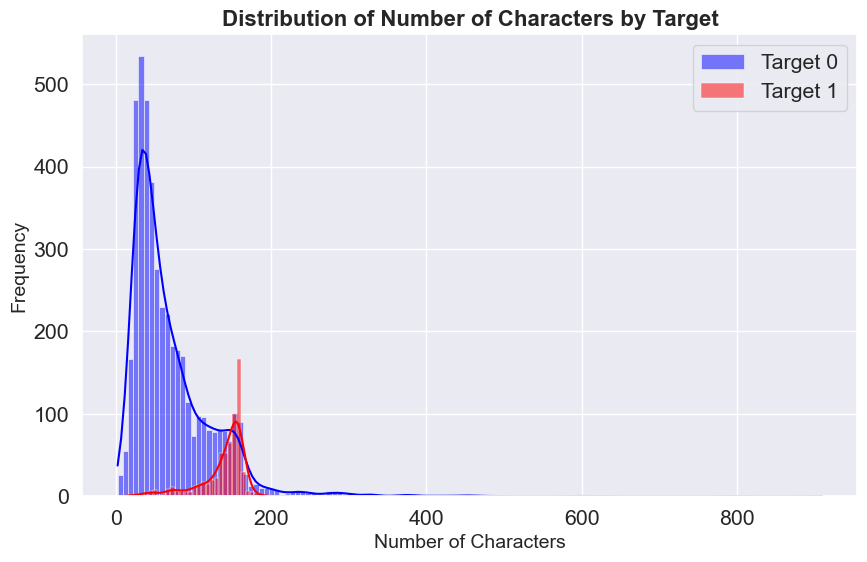

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color = 'blue', kde = True, label = 'Target 0')

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')
plt.legend()
# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background
plt.show()


paitplot for data in visualization

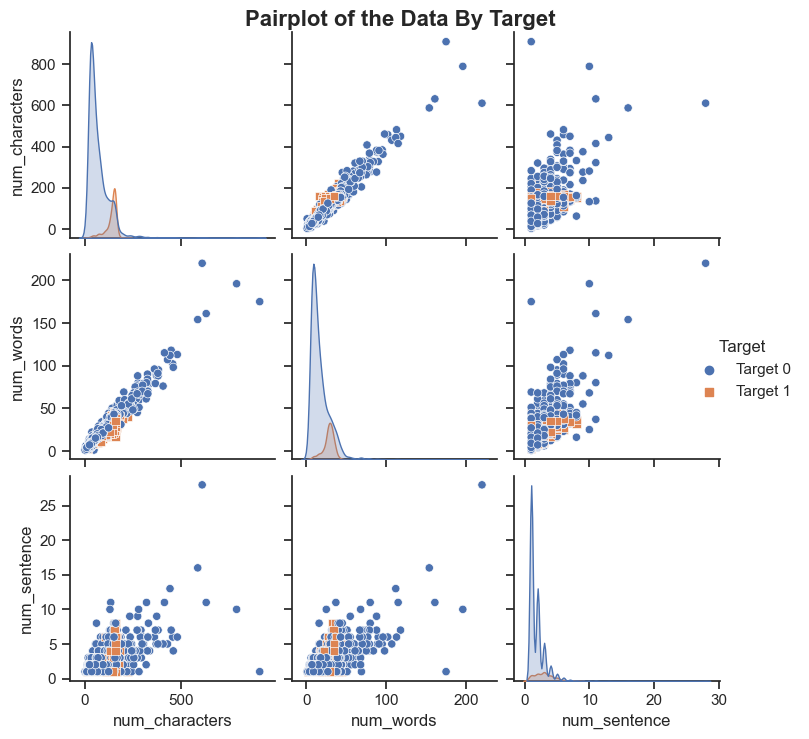

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = 'ticks', color_codes = True)
g = sns.pairplot(df , hue = 'target', diag_kind = 'kde' , markers= ["o", "s"])

g.fig.suptitle("Pairplot of the Data By Target" , fontsize = 16 , fontweight = 'bold')
plt.subplots_adjust(top=0.95)#adjust the position title
g._legend.set_title('Target ')
for t, l in  zip(g._legend.texts , ["Target 0 " , "Target 1 " ]):
    t.set_text(l)

plt.show()

Correlation

In [143]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentence,0.284901,0.638143,0.684541,1.000000


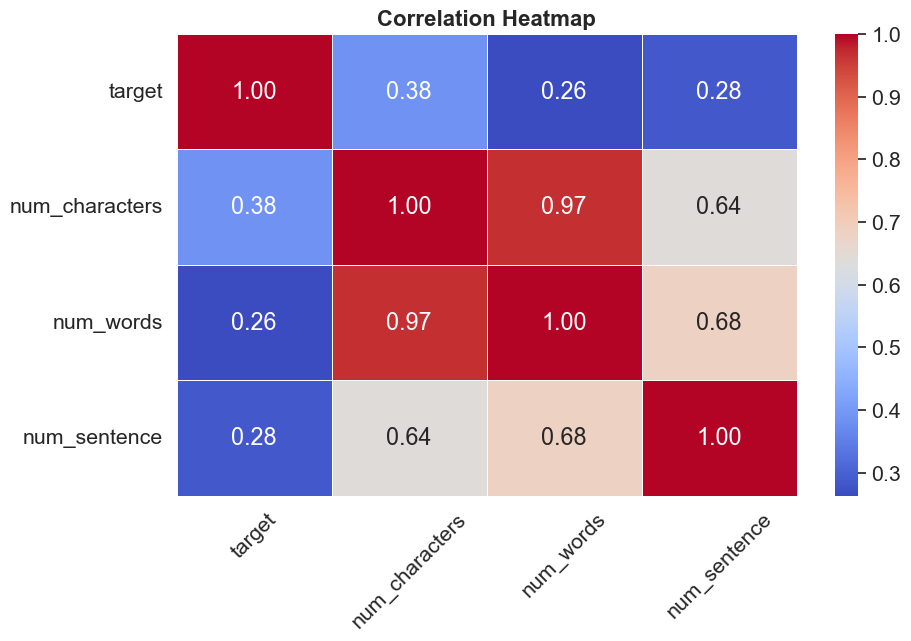

In [144]:
correlation_matrix = df[['target','num_characters', 'num_words', 'num_sentence']].corr()
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5 , fmt = '.2f')

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

Data Preprocessing


In [145]:
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
          # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)
    

In [146]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat'

creating a new column :  'transformed_text'

In [147]:
df['transformed_text'] = df['text'].apply(transform_text)


C:\Users\nagir\AppData\Local\Temp\ipykernel_52484\87086937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [148]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FFF"), ('font-weight', 'bold')]}
])

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri in 2 a wkli comp to win fa cup final tkt 21st may text fa to 87121 to receiv entri question std txt rate t c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah i do think he goe to usf he live around here though


In [149]:
import wordcloud
import PIL

print("WordCloud version:", wordcloud.__version__)
print("Pillow version:", PIL.__version__)
# Pillow version: 9.4.0 is necessary for compatibility with python versions before 9. anymore version 9 is not supported

WordCloud version: 1.9.4
Pillow version: 9.4.0


 Word Cloud for Spam Messages

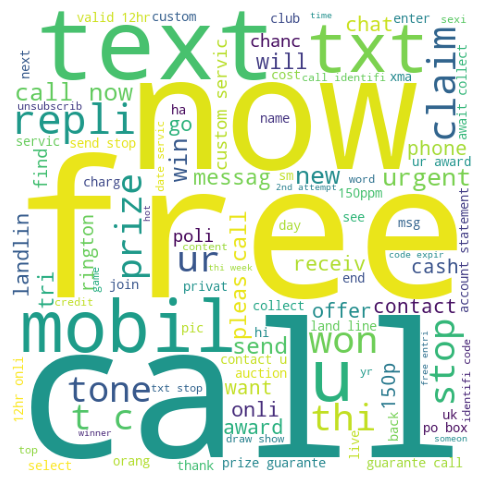

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.axis("off")
plt.show()


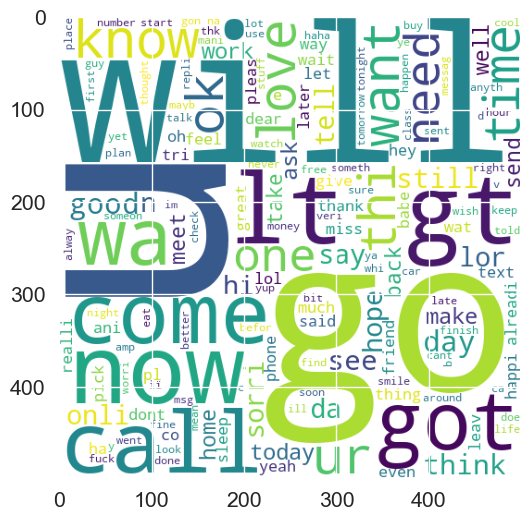

In [151]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [152]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [153]:
from collections import Counter 
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))


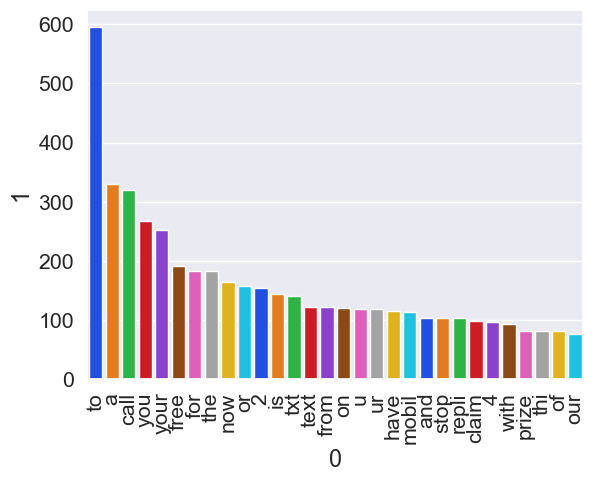

In [154]:
sns.barplot(data = filter_df, x = filter_df[0] , y = filter_df[1] , palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

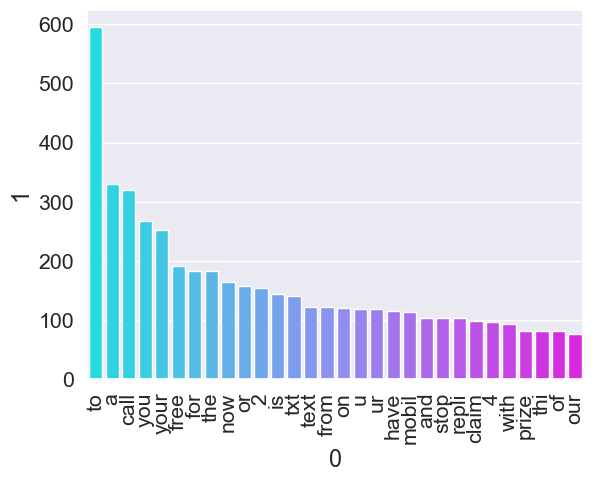

In [155]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

 Initializing CountVectorizer and TfidfVectorizer

In [156]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

 Dependent and Independent Variable

In [157]:
from sklearn.model_selection import train_test_split

X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

#  Split into Train and Test Data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

importing the models


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 



initialise the models 


In [163]:
svc = SVC(kernel = 'sigmoid' , gamma = 1.0) # gamma=1.0 indicates moderate level of influence for each data point .
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(random_state = 5)
lrc = LogisticRegression(solver = 'liblinear' , penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50 , random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50 , random_state = 2)
bc = BaggingClassifier(n_estimators=54 , random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50 , random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 54 , random_state = 2)
xgb = XGBClassifier(n_estimators = 50 , random_state = 2)

 Dictionary of the Models

In [164]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

In [165]:
from sklearn.metrics import accuracy_score , precision_score
def train_classifier(clfs , X_train , y_train , X_test , y_test):
    clfs.fit(X_train , y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    return accuracy , precision 

In [166]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy , current_precision = train_classifier(clfs , X_train , y_train , X_test , y_test)
    print("for: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for:  SVC
Accuracy:  0.9806576402321083
Precision:  0.9836065573770492
for:  KNN
Accuracy:  0.90715667311412
Precision:  1.0
for:  NB
Accuracy:  0.9680851063829787
Precision:  1.0
for:  DT
Accuracy:  0.9410058027079303
Precision:  0.7692307692307693
for:  LR
Accuracy:  0.9622823984526112
Precision:  0.9459459459459459
for:  RF
Accuracy:  0.971953578336557
Precision:  1.0
for:  Adaboost
Accuracy:  0.9680851063829787
Precision:  0.926829268292683
for:  Bgc
Accuracy:  0.9671179883945842
Precision:  0.9193548387096774
for:  ETC
Accuracy:  0.9796905222437138
Precision:  0.9834710743801653
for:  GBDT
Accuracy:  0.9564796905222437
Precision:  0.9428571428571428
for:  xgb
Accuracy:  0.9816247582205029
Precision:  0.983739837398374


Support Vector Classifier (SVC) and Random Forest (RF) demonstrated the highest accuracy .